In [1]:
#ex 3.76
from sympy import *
init_session()
from sympy.stats import *
import matplotlib.pyplot as plt
import numpy as np


F, a, b, R, mttf, l =symbols('F a b R mttf l')



IPython console for SymPy 1.4 (Python 3.7.4-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.4/



In [7]:
f_time=np.array([98, 116, 2485, 2526, 2920]) #hours
f_time_ln=np.log(f_time)
n=len(f_time)

In [11]:
unreliability=[]
for i in range(1,len(f_time)+1):
    unreliability.append(round((i-0.375)/(n+0.25),4))
unreliability 


In [13]:
def normal_inverse(f_t):
    return N(sqrt(2)*erfinv(2*f_t-1),4)
normalinverse=[]
for i in unreliability:
    normalinverse.append(normal_inverse(i))
normalinverse  

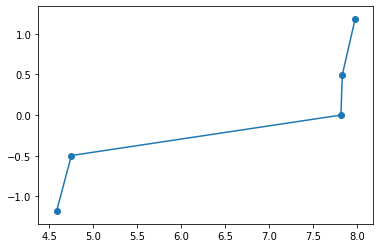

In [17]:
plt.plot(f_time_ln,normalinverse)
plt.scatter(f_time_ln,normalinverse)

fitted slope
0.447304714284090
fitted bias
-2.94955562779573


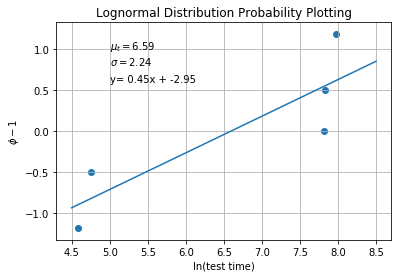

In [71]:
x_axis = np.array(f_time_ln)
y_axis = np.array(normalinverse)

#regressão linear dos eixos X e Y - eq 2.156 Modarres - Método dos menores quadrados 
x_mean=np.mean(x_axis)
y_mean=np.mean(y_axis)
x_xi=np.subtract(x_axis,x_mean) #xi-x_mean
y_yi=np.subtract(y_axis,y_mean) #yi - y_mean
numerador = np.sum(np.multiply(x_xi,y_yi))
denumerador = np.sum(np.multiply(x_xi,x_xi))
slope= numerador/denumerador
bias = y_mean-slope*x_mean
print('fitted slope')
print(slope)
print('fitted bias')
print(bias)

range_variable_start=4.5 #definir a faixa de plotagem
range_variable_end=9 #definir a faixa de plotagem conforme a faixa dos dados
def predict(range_variable):
    return slope*range_variable+bias

MU= -bias/slope
SIGMA=lnti84-MU
vector=np.arange(range_variable_start,range_variable_end)
plt.grid(True)
plt.text(5, 1, r'$\mu_t=$'+str(round(MU,2)))
plt.text(5, 0.8, r'$\sigma=$'+str(round(SIGMA,2)))
plt.text(5, 0.6, "y= "+str(round(slope,2))+"x + "+str(round(bias,2)))
plt.xlabel('ln(test time)')
plt.ylabel(r'$\phi-1$')
plt.title('Lognormal Distribution Probability Plotting')            
plt.plot(vector,predict(vector), label='fitted line')


plt.scatter(f_time_ln,normalinverse)